# MÉTODO DAS DIFERENÇAS FINITAS

Método que se baseia na aproximação de derivadas por diferenças finitas. A aproximação da derivada pode ser feita com a expanção em série de Taylor como segue.

$$ f(x+h) = f(x) + h f'(x) + \frac{h^2 f''(x)}{2!} + \frac{h^3 f'''(x)}{3!} + o(h^4)$$

A derivada pode ser aproximada com o truncamento da expressão (Forward Euler).

$$ f'(x) = \frac{f(x+h)-f(x)}{h} + o(h) $$

Da mesma forma, pode ser obtida a aproximação considerando a diferença entre $f(x)$ e $f(x-h)$ (Backward Euler).

$$ f'(x) = \frac{f(x)-f(x-h)}{h} + o(h) $$

Erros de segunda ordem podem ser obtidos fazendo diferença centrada.

$$ f'(x) = \frac{f(x+h)-f(x-h)}{2h} + o(h^2) $$

A derivada de segunda ordem também pode ser obtida da expansão em séries de Taylor para $f(x+h)$ e $f(x-h)$. A soma das duas expressões resulta em:

$$ f(x+h) + f(x-h) = 2 f(x) + h^2 f''(x) + o(h^4) \rightarrow f''(x) = \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2} + o(h^2) $$

## Aplicação em problema de contorno 

Problema proposto:

$$ -\frac{d^2 f}{dx^2} = 2 $$

### Fixo-fixo

Vamos resolver o problema para a condição de contorno fixo-fixo, ou seja, $f(0)=0$ e $f(1)=0$.

A solução analítica para o problema aplicando as condições de contorno é $f(x) = -x^2 + x$

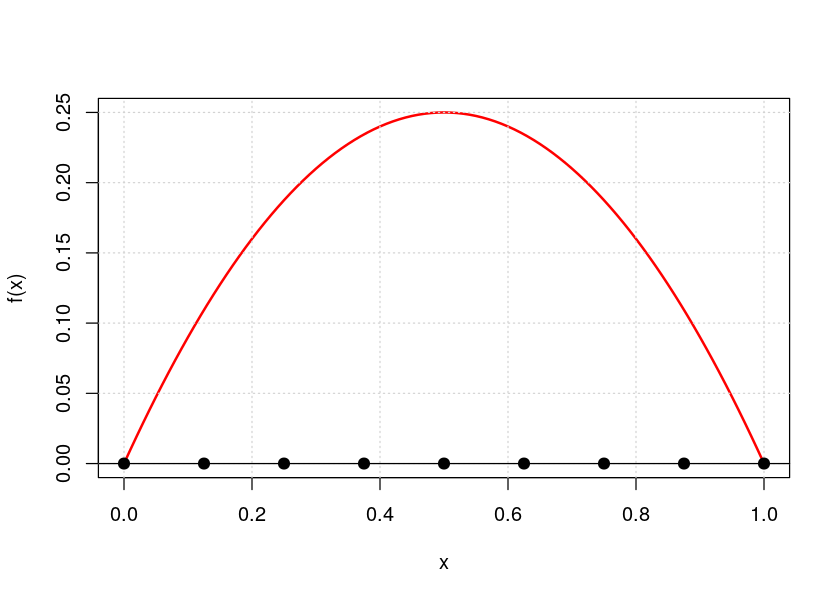

In [2]:
# Apenas reduzindo o tamanho dos gráficos...
require(repr)
options(repr.plot.width=7, repr.plot.height=5)

# vetor com os valores de x
xteo <- seq(0,1,by=0.01) 

# malha de nós utilizada
malha <- seq(0,1,by=0.125)

# solução analítica que será utilizada na comparação
analitico1 <- function(x){
    f <- -x^2 + x
    return(f)
}

# plotando gráfico da solução analítica
plot(xteo, analitico1(xteo), t='l', lwd=2, col=2, xlab='x', ylab='f(x)')
grid()
points(malha, rep(0,length(malha)), pch=19, cex=1.2)
abline(h=0)

Dividindo a barra em 9 nós (com índices de 0 a 8), sendo o primeiro nó e o nono nó localizados na extremidade, pode-se escrever o problema no formato discreto:

$$ \frac{-f_{i+1} + 2f_i - f_{i-1}}{(\Delta x)^2} = 2$$

ou no formato matricial:

\begin{equation*}
\frac{1}{(0,125)^2}\begin{bmatrix}
2 & -1 & 0 & \dots & 0 & 0 & 0 \\
-1 & 2 & -1 & \dots & 0 & 0 & 0 \\
0 & -1 & 2 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \dots & 0 & -1 & 2 
\end{bmatrix} \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_8 
\end{bmatrix} = \begin{bmatrix} 2 \\ 2 \\ 2 \\ \vdots \\ 2 
\end{bmatrix}
\end{equation*}

In [3]:
dx <- 0.125
K <- (1/dx^2)*toeplitz(c(2,-1,0,0,0,0,0))
b <- rep(2,7)

# Resolvendo x para Kx = b
num1 <- solve(K,b)

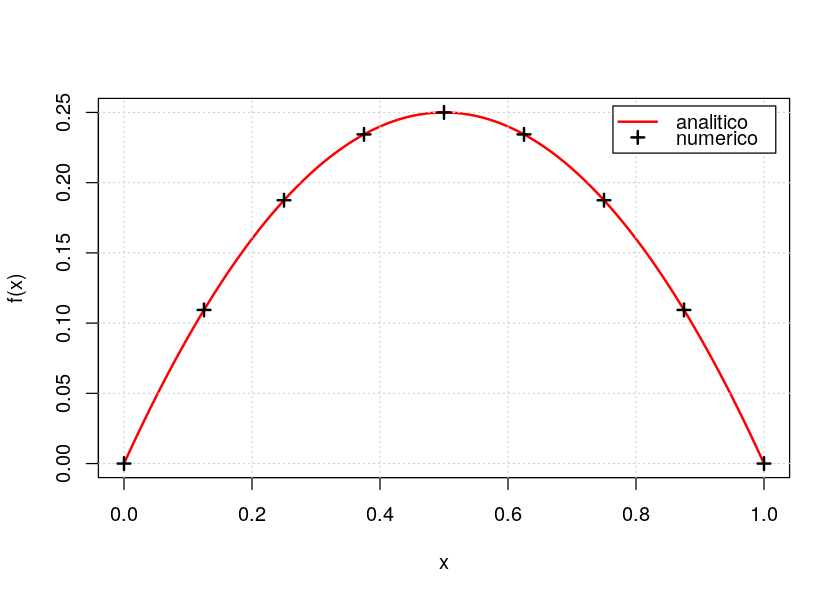

In [4]:
# Compração do resultado analítico com o resultado numérico
xnum <- seq(0,1,by=0.125)
plot(xteo, analitico1(xteo), t='l', lwd=2, col=2, xlab='x', ylab='f(x)')
grid()
points(xnum, c(0,num1,0), pch=3, lwd=2)
legend("topright", legend=c('analitico', 'numerico'), col=c(2,1), pch=c(NA,3),
      lty=c(1,NA), lwd=c(2,2), inset=0.02, bg='white')

### Livre-fixo


Vamos resolver o mesmo problema, mas mudando a condição de contorno do primeiro nó, tal que $\frac{df}{dx}(0) = 0$ e $f(1)=0$

Para este problema a solução analítica é $f(x) = -x^2 + 1$

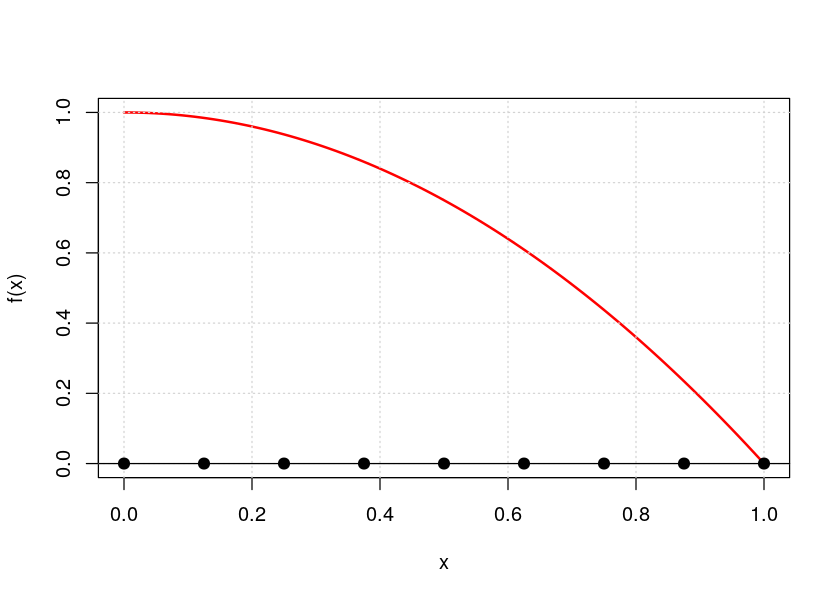

In [5]:
# Solução analítica
analitico2 <- function(x){
    f <- -x^2 + 1
    return(f)
}

# Plotando solução analítica
plot(xteo, analitico2(xteo), t='l', lwd=2, col=2, xlab='x', ylab='f(x)')
grid()
points(malha, rep(0,length(malha)), pch=19, cex=1.2)
abline(h=0)

Como a condição de contorno do primeiro nó é dada por sua derivada, a primeira linha da matriz simétrica utilizada no caso de fixo-fixo precisa ser alterada. Aplicando uma aproximação de primeira ordem para a derivada, 

$$ \frac{f_1 - f_0}{\Delta x} = 0 \qquad logo \qquad f_1 = f_0 $$

e na primeira linha...

$$ \frac{-f_2 + 2f_1 - f_0}{(\Delta x)^2} =  \frac{-f_2 + 2f_1 - f_1}{(\Delta x)^2} = \frac{-f_2 + f_1}{(\Delta x)^2} = 2$$

ou no formato matricial:

\begin{equation*}
\frac{1}{(0,125)^2}\begin{bmatrix}
\color{red}{1} & \color{red}{-1} & \color{red}{0} & \dots & \color{red}{0} & \color{red}{0} & \color{red}{0} \\
-1 & 2 & -1 & \dots & 0 & 0 & 0 \\
0 & -1 & 2 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \dots & 0 & -1 & 2 
\end{bmatrix} \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_8 
\end{bmatrix} = \begin{bmatrix} 2 \\ 2 \\ 2 \\ \vdots \\ 2 
\end{bmatrix}
\end{equation*}

In [6]:
Ta <- toeplitz(c(2,-1,0,0,0,0,0))
Ta[1,1] <- 1
Ta <- (1/dx^2)*Ta

# Resolvendo o sistema Ta.x = b
num2a <- solve(Ta,b)

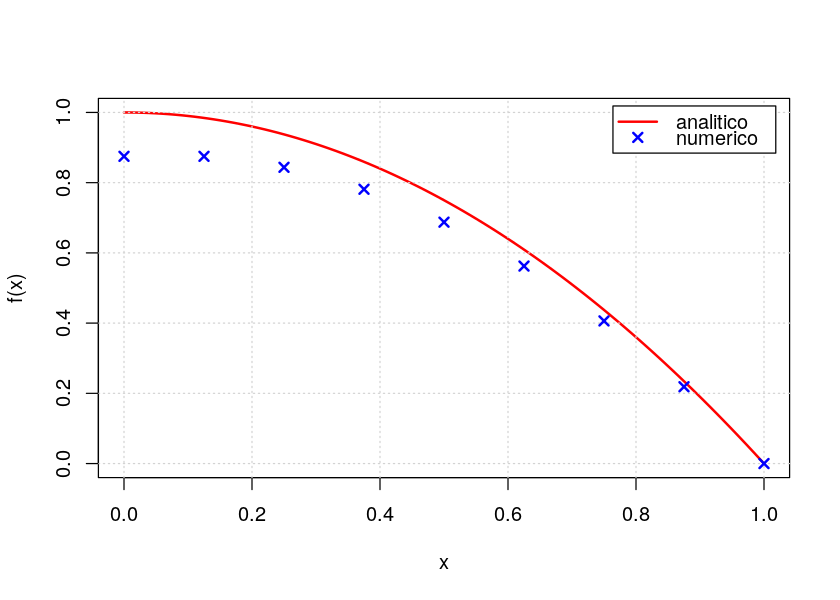

In [7]:
# Comparando solução analítica com solução numérica
plot(xteo, analitico2(xteo), t='l', lwd=2, col=2, xlab='x', ylab='f(x)')
grid()
points(xnum, c(num2a[1],num2a,0), pch=4, lwd=2, col=4)
legend("topright", legend=c('analitico', 'numerico'), col=c(2,4), pch=c(NA,4),
      lty=c(1,NA), lwd=c(2,2), inset=0.02, bg='white')

Aproximação de primeira ordem para a ponta livre produz o erro de ordem $\Delta x$ que pode ser observado no gráfico. Para melhorar o resultado pode-se aplicar diferenças centradas.

$$ \frac{f_1 - f_{-1}}{2 \Delta x} = 0 \qquad logo \qquad f_1 = f_{-1} $$

A matriz terá uma linha adicional.

$$ \frac{-f_1+ 2f_0- f_{-1}}{\Delta x)^2} =  \frac{-2f_1 + 2f_0}{(\Delta x)^2} = 2$$

Para matriz manter a simeria, dividir a primeira linha por dois.

$$ \frac{-f_1 + f_0}{(\Delta x)^2} = 1$$

ou no formato matricial:

\begin{equation*}
\frac{1}{(0,125)^2}\begin{bmatrix}
\color{red}{1} & \color{red}{-1} & \color{red}{0} & \dots & \color{red}{0} & \color{red}{0} & \color{red}{0} \\
-1 & 2 & -1 & \dots & 0 & 0 & 0 \\
0 & -1 & 2 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \dots & 0 & -1 & 2 
\end{bmatrix} \begin{bmatrix} f_0 \\ f_1 \\ f_2 \\ \vdots \\ f_8 
\end{bmatrix} = \begin{bmatrix} \color{red}{1} \\ 2 \\ 2 \\ \vdots \\ 2 
\end{bmatrix}
\end{equation*}

In [8]:
Tb <- toeplitz(c(2,-1,0,0,0,0,0,0))
Tb[1,1] <- 1
Tb <- (1/dx^2)*Tb
bb <- c(1,b)

# Resolvendo o sistema linear Tb.x = bb
num2b <- solve(Tb,bb)

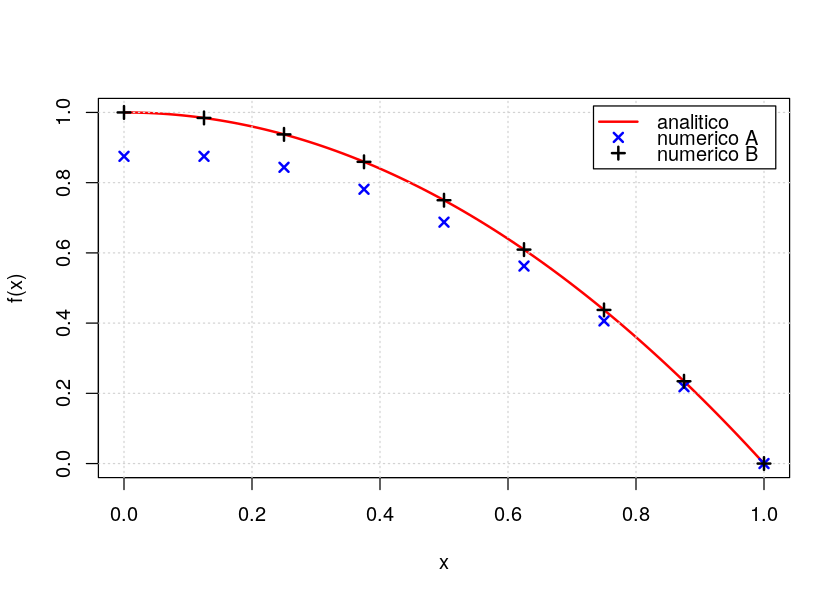

In [10]:
# Comparação da solução analítica com a solução numérica anterior e a solução 
# numérica melhorada
plot(xteo, analitico2(xteo), t='l', lwd=2, col=2, xlab='x', ylab='f(x)')
grid()
points(xnum, c(num2a[1],num2a,0), pch=4, lwd=2, col=4)
points(xnum, c(num2b,0), pch=3, lwd=2, col=1)
legend("topright", legend=c('analitico', 'numerico A', 'numerico B'), col=c(2,4,1), pch=c(NA,4,3),
      lty=c(1,NA,NA), lwd=c(2,2,2), inset=0.02, bg='white')

## Aplicação em problema de valor inicial

Problema de oscilação de um sistema massa-mola de um grau de liberdade (1 GDL)
.

$$ m \frac{d^2u}{dt^2} + k u = 0$$

Condições de contorno: $u(0) = 1$ e $u''(0) = 0$


**Solução exata**

Considerando $m = k = 1$, a solução exata para o problema é $ u(t) = cos(t) $

Tomando a derivada, $u'(t) = - sen(t)$, pode-se traçar o diagrama de fase.

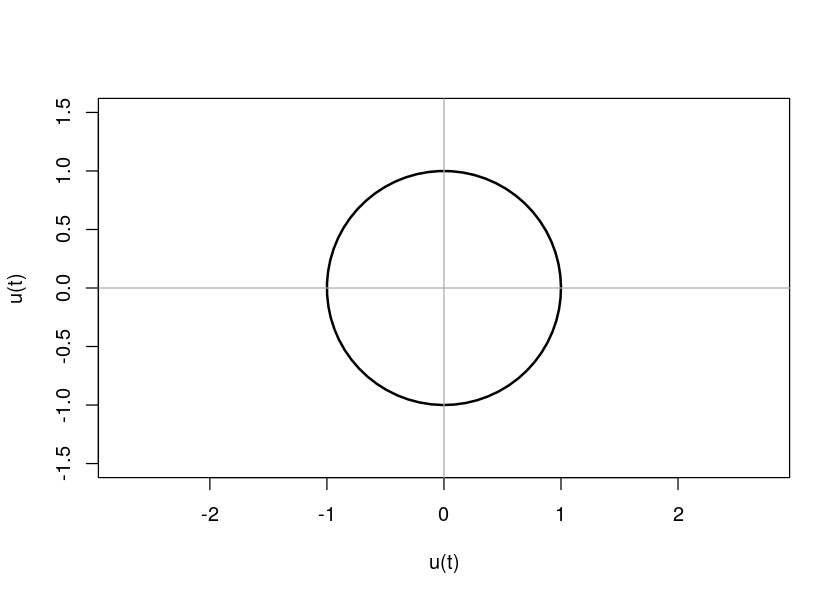

In [11]:
# Plotando solução analítica
tt <- seq(0,8,by=0.1)
plot(cos(tt), sin(tt), t='l', xlab='u(t)', ylab='u(t)', ylim=c(-1.5,1.5), asp=1, lwd=2)
abline(h=0,v=0, col='darkgray')

**Solução numérica utilizando MDF**

Sempre prosso escrever ODE de ordem elevada em um sistema de equações de primeira ordem.

\begin{cases}
u' = v \\
v' = -u
\end{cases}

<u>Primeira possibilidade</u>

Usar diferenças progressivas (Forward Euler)

\begin{cases}
u_{n+1} = u_n + \Delta t v_n \\
v_{n+1} = v_n - \Delta t u_n
\end{cases}

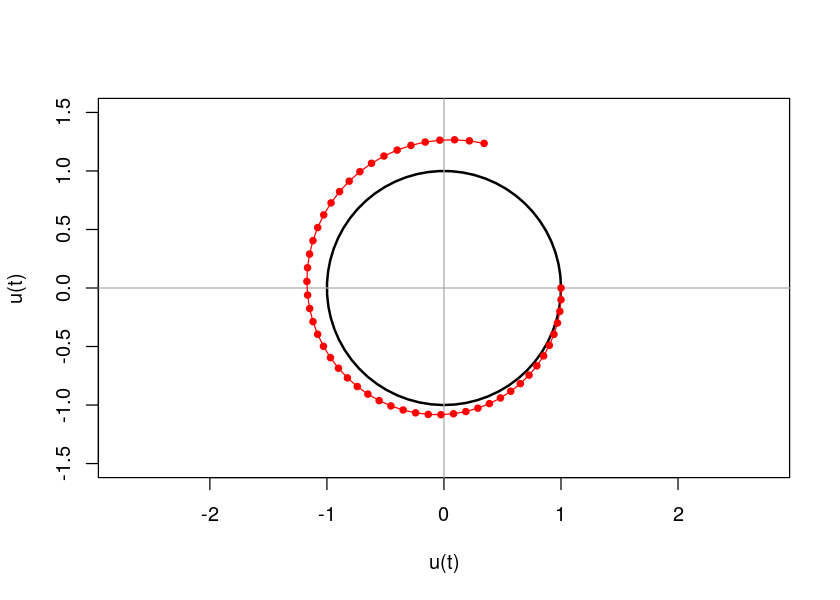

In [13]:
# Função para estimativa da derivada pelo método de Euler utilizando diferenças progressivas
# dt: variação do tempo
# u0 e v0: condições iniciais de deslocamento e velocidade respectivamente
# steps: número de passos no tempo
forwardFun <- function(dt, u0, v0, steps){
    u <- u0; v <- v0
    for(i in 1:steps){
        k <- i+1
        u[k] <- u[i] + dt*v[i]
        v[k] <- v[i] - dt*u[i]
    }
    return(cbind(u,v))
}

# Estimativa da solução utilizando diferenças progressivas
df <- forwardFun(dt=0.1, u0=1, v0=0, steps=50)

# Comparando com a solução analítica
plot(cos(tt), sin(tt), t='l', xlab='u(t)', ylab='u(t)', ylim=c(-1.5,1.5), asp=1, lwd=2)
abline(h=0,v=0, col='darkgray')
points(df, col=2, pch=19, t='b', cex=0.7)
points(df, col=2, pch=19, t='l')

<u>Segunda possibilidade</u>

Usar diferenças regressivas (Backward Euler)

\begin{cases}
u_{n+1} = u_n + \Delta t v_{n+1} \\
v_{n+1} = v_n - \Delta t u_{n+1}
\end{cases}

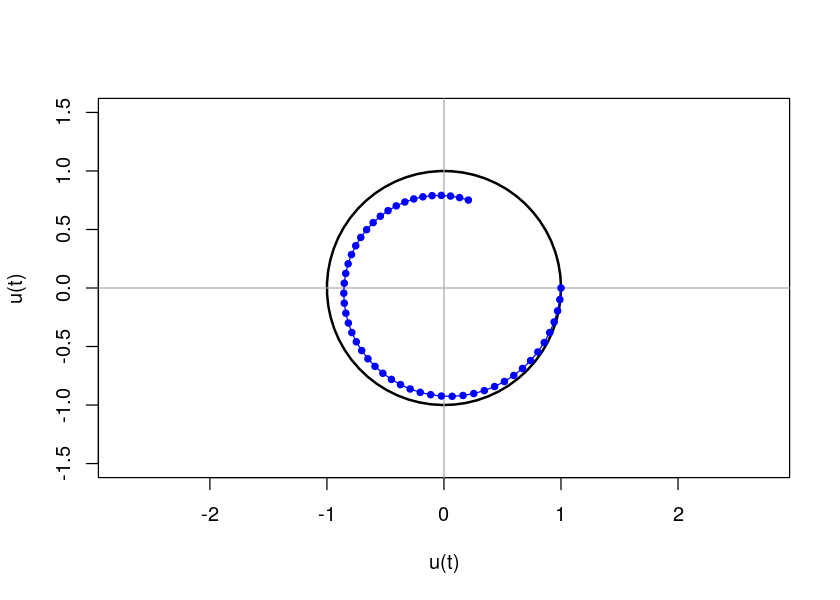

In [14]:
# Função para estimativa da derivada pelo método de Euler utilizando diferenças regressivas
# dt: variação do tempo
# u0 e v0: condições iniciais de deslocamento e velocidade respectivamente
# steps: número de passos no tempo
backwardFun <- function(dt, u0, v0, steps){
    u <- u0; v <- v0
    for(i in 1:steps){
        k <- i+1
        u[k] <- (u[i] + dt*v[i])/(1+dt^2)
        v[k] <- v[i] - dt*u[k]
    }
    return(cbind(u,v))
}

# Estimativa da solução utilizando diferenças regressivas
df <- backwardFun(dt=0.1, u0=1, v0=0, steps=50)

# Comparando com a solução analítica
plot(cos(tt), sin(tt), t='l', xlab='u(t)', ylab='u(t)', ylim=c(-1.5,1.5), asp=1, lwd=2)
abline(h=0,v=0, col='darkgray')
points(df, col=4, pch=19, t='b', cex=0.7)
points(df, col=4, pch=19, t='l')

<u>Terceira possibilidade</u>

Usar diferenças centradas 

\begin{cases}
u_{n+1} = u_n + \Delta t v_n \\
v_{n+1} = v_n - \Delta t u_{n+1}
\end{cases}

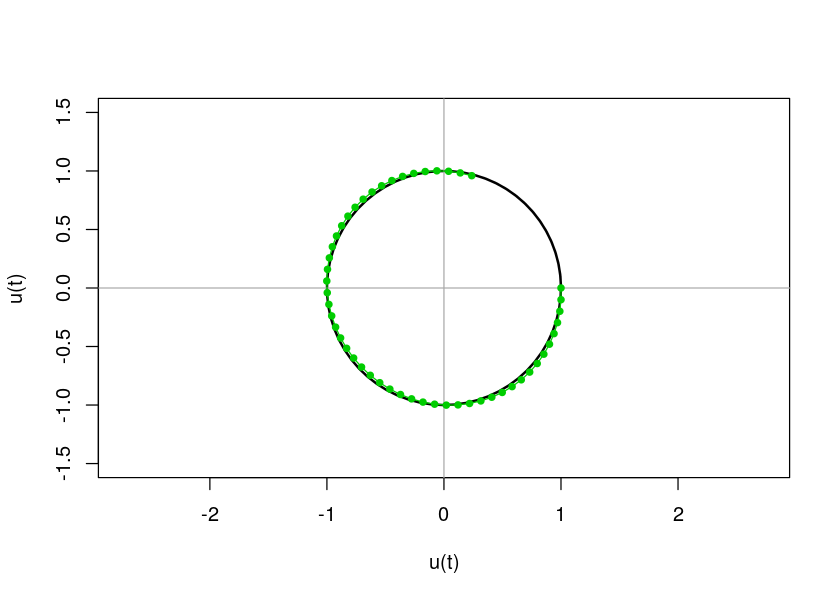

In [15]:
# Função para estimativa da derivada pelo método das diferenças centradas (Euler melhorado - o(h²))
# dt: variação do tempo
# u0 e v0: condições iniciais de deslocamento e velocidade respectivamente
# steps: número de passos no tempo
centerFun <- function(dt, u0, v0, steps){
    u <- u0; v <- v0
    for(i in 1:steps){
        k <- i+1
        u[k] <- u[i] + dt*v[i]
        v[k] <- v[i] - dt*u[k]
    }
    return(cbind(u,v))
}

# Estimativa da solução utilizando diferenças centradas
df <- centerFun(dt=0.1, u0=1, v0=0, steps=50)

# Comparando com a solução analítica
plot(cos(tt), sin(tt), t='l', xlab='u(t)', ylab='u(t)', ylim=c(-1.5,1.5), asp=1, lwd=2)
abline(h=0,v=0, col='darkgray')
points(df, col=3, pch=19, t='b', cex=0.7)
points(df, col=3, pch=19, t='l')